# T1 - Parte 4

## 4 - Regressão Logística com Regularização

### 4.1 - Visualização dos Dados

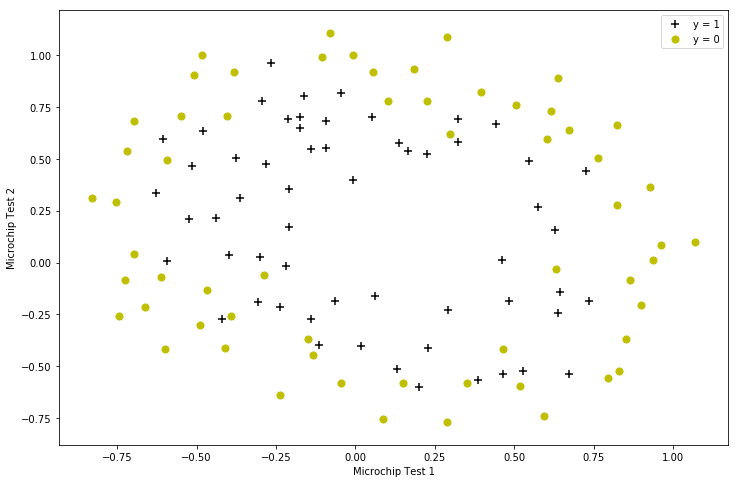

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv("ex2data2.txt", header=None,
                      names=['teste1', 'teste2', 'resultado'])


aprovado = dataset[dataset['resultado'].isin([1])]
rejeitado = dataset[dataset['resultado'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(aprovado['teste1'], aprovado['teste2'],
           s=50, c='k', marker='+', label='y = 1')

ax.scatter(rejeitado['teste1'], rejeitado['teste2'],
           s=50, c='y', marker='o', label='y = 0')
ax.legend()
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
plt.show()

### 4.2 - Mapeamento de características (feature mapping)

In [7]:
import pandas as pd
import numpy as np

def mapFeature(x):

    registros = x.shape[0]

    for i in range(1, 6):
        for j in range(1, 6):
            new_features = np.multiply(x[:, 1] ** i, x[:, 2] ** j)
            new_features = np.reshape(new_features, (registros, 1))
            x = np.concatenate((x, new_features), axis=1)

    return x


dataset = pd.read_csv("ex2data2.txt", header=None,
                      names=['teste1', 'teste2', 'resultado'])
dataset.insert(0, 'Ones', 1)
dataset = np.array(dataset)
cols = dataset.shape[1]
X = dataset[:, 0:cols - 1]


new_x = mapFeature(X)
new_x

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         1.21245165e-07,  8.48182678e-08,  5.93354674e-08],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
        -2.20465113e-06, -1.51005374e-06, -1.03429621e-06],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
        -1.47881251e-04, -1.02370796e-04, -7.08661834e-05],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
        -2.66252288e-02, -2.66057924e-02, -2.65863702e-02],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
        -1.01920483e-11, -1.01846081e-11, -1.01771734e-11],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
        -2.90731893e-06,  8.89988470e-08, -2.72443271e-09]])

### 4.3 - Função de custo e gradiente

In [13]:
import pandas as pd
import numpy as np
import scipy.optimize as opt

def sigmoide(z):
    return 1.0 / (1 + np.exp(-z))

def costFunctionReg(theta, X, y, alpha):

    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    reg = (alpha / 2 * len(X)) * np.sum(np.asarray(
        theta[:, 1:theta.shape[1]]) ** 2)

    return np.sum(grad0 - grad1) / (len(X)) + reg

def costFunctionReg(theta, X, y, alpha):

    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    reg = (alpha / 2 * len(X)) * np.sum(np.asarray(
        theta[:, 1:theta.shape[1]]) ** 2)

    return np.sum(grad0 - grad1) / (len(X)) + reg


dataset = pd.read_csv("ex2data2.txt", header=None,
                      names=['teste1', 'teste2', 'resultado'])
dataset.insert(0, 'Ones', 1)
dataset = np.array(dataset)
cols = dataset.shape[1]
X = dataset[:, 0:cols - 1]
y = dataset[:, cols - 1:]


new_x = mapFeature(X)

theta = np.zeros(len(new_x.T))

custo = costFunctionReg(theta, new_x, y, 1)
print("Custo para Lambda = 1: " + str(custo))

custo = costFunctionReg(theta, new_x, y, 0)
print("Custo para Lambda = 0: " + str(custo))

custo = costFunctionReg(theta, new_x, y, 100)
print("Custo para Lambda = 100: " + str(custo))

Custo para Lambda = 1: 0.6931471805599454
Custo para Lambda = 0: 0.6931471805599454
Custo para Lambda = 100: 0.6931471805599454


In [15]:
def gradRegLog(theta, X, y, alpha):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parametros = int(theta.ravel().shape[1])
    grad = np.zeros(parametros)

    erro = sigmoide(X * theta.T) - y

    for i in range(parametros):
        term = np.multiply(erro, X[:, i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X))
            + ((alpha / len(X)) * theta[:, i])

    return grad


# Encontrando os valores ótimos de theta através da função optmize do Scipy,
# assim como calculamos para os exercícios da Parte 3
opt_theta = opt.fmin_tnc(func=costFunctionReg, x0=theta,
                         fprime=gradRegLog, args=(new_x, y, 1))
print(opt_theta)

(array([ 4.02746336e-06,  7.74505598e-07,  6.77686008e-06, -5.97366681e-05,
        1.29944304e-05,  2.02021400e-05, -5.55358405e-06,  1.86277964e-05,
        2.39942417e-05, -9.20755135e-05, -1.88595841e-05, -5.15808576e-05,
       -2.67825062e-05,  3.34052933e-05,  1.21150882e-05,  2.87903290e-05,
        9.42426647e-06,  1.70795540e-05, -4.92156536e-06, -4.96692965e-05,
       -9.33245209e-07, -1.43280758e-05, -2.55454019e-06,  2.03819692e-05,
       -4.28572936e-06,  1.52234523e-05,  2.71916269e-06,  7.80025639e-06]), 107, 1)
